In [27]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
!pip install seaborn

In [2]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning libraries:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

import warnings 
warnings.filterwarnings('ignore')

2022-09-18 19:51:29.517730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Importing the data
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

# 1. Data Preprocessing:

The train and test set contain all the record of the ECG signal for many subjects.
The last column represents the class of each record:
- 0: Normal Heart beat
- 1: Unknown Heart beat
- 2: Ventricular Ectopic beat
- 3: Superventricular Ectopic beat
- 4: Fusion beat

In [31]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
print(train.shape)
print(test.shape)

(87554, 188)
(21892, 188)


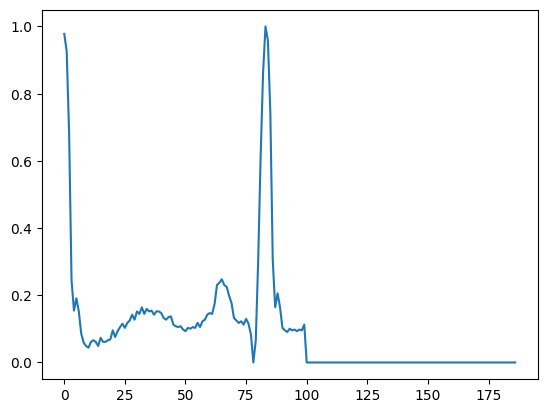

In [34]:
# Visualize the first row after excluding the last column (Class):
plt.plot(train.iloc[0, train.columns != 187])
plt.show()

In [35]:
# observing the number of subject per class:
train.iloc[:, -1].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

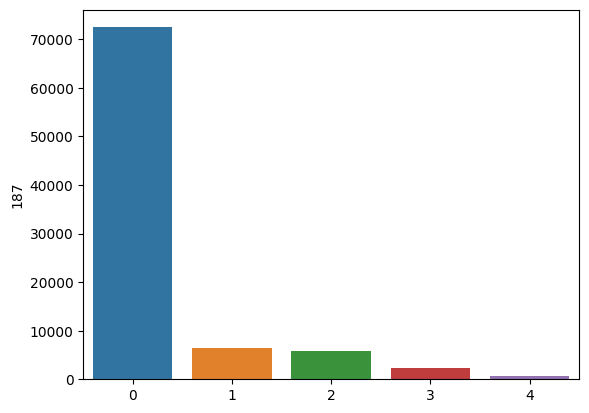

In [36]:
# Visualize the number of subjects in each class in the train dataset:
classes = [0, 1, 2, 3, 4]
sns.barplot(x=classes, y=train.iloc[:, -1].value_counts())
plt.show()

In [37]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# checking missing values:
train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [39]:
test.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [40]:
# Splitting the data:
# creating X and y from train dataset:
X_train = train.loc[:,train.columns !=187]
y_train = train.loc[: , train.columns == 187]

In [41]:
# data balancing:
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X_train, y_train)

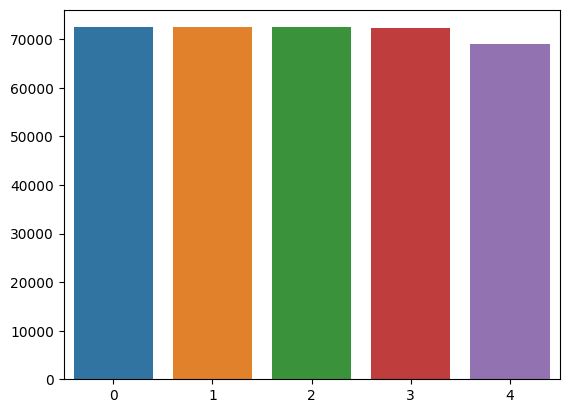

In [42]:
sns.barplot(x= classes, y=y_res.value_counts())
plt.show()

In [43]:
# creating Validation set from train set:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [44]:
# creating X and y from test dataset:
X_test = test.loc[:,train.columns !=187]
y_test = test.loc[: , train.columns == 187]

# 2. Building a Model:

In [55]:
def ann_model():
    model = Sequential()
    model.add(Dense(50, input_shape=(187,), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [56]:
model = ann_model()
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
8970/8970 [==============================] - 16s 2ms/step - loss: 0.5191 - accuracy: 0.8173 - val_loss: 0.2021 - val_accuracy: 0.9280
Epoch 2/20
8970/8970 [==============================] - 19s 2ms/step - loss: 0.1682 - accuracy: 0.9400 - val_loss: 0.1294 - val_accuracy: 0.9551
Epoch 3/20
8970/8970 [==============================] - 18s 2ms/step - loss: 0.1168 - accuracy: 0.9593 - val_loss: 0.0976 - val_accuracy: 0.9667
Epoch 4/20
8970/8970 [==============================] - 14s 2ms/step - loss: 0.0926 - accuracy: 0.9680 - val_loss: 0.0898 - val_accuracy: 0.9692
Epoch 5/20
8970/8970 [==============================] - 15s 2ms/step - loss: 0.0774 - accuracy: 0.9737 - val_loss: 0.0721 - val_accuracy: 0.9754
Epoch 6/20
8970/8970 [==============================] - 15s 2ms/step - loss: 0.0674 - accuracy: 0.9770 - val_loss: 0.0598 - val_accuracy: 0.9798
Epoch 7/20
8970/8970 [==============================] - 14s 2ms/step - loss: 0.0596 - accuracy: 0.9801 - val_loss: 0.0584 - val_ac

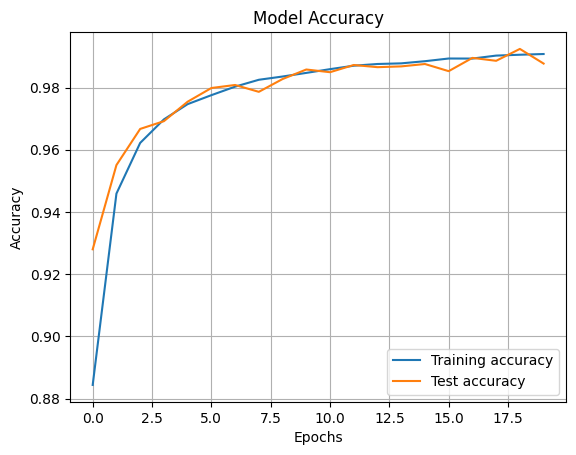

In [57]:
# Training and validation Accuracy:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Test accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

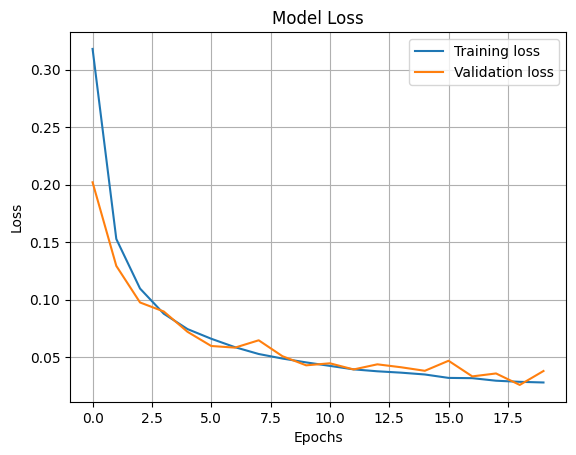

In [58]:
# Training and validation Loss:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

# 3. Model Predictions and Evaluation:

In [59]:
# prediction for ANN model:
model_predictions = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Model Accuracy is {test_acc}')
print(f'Model Loss is {test_loss}')

685/685 [==============================] - 1s 945us/step - loss: 0.2269 - accuracy: 0.9594
Model Accuracy is 0.9593915343284607
Model Loss is 0.22691485285758972


In [60]:
# Classification report:
print(classification_report(y_true=y_test, y_pred=np.argmax(model_predictions, axis=1)))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     18118
         1.0       0.51      0.79      0.62       556
         2.0       0.92      0.92      0.92      1448
         3.0       0.59      0.83      0.69       162
         4.0       0.96      0.98      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.79      0.90      0.84     21892
weighted avg       0.97      0.96      0.96     21892



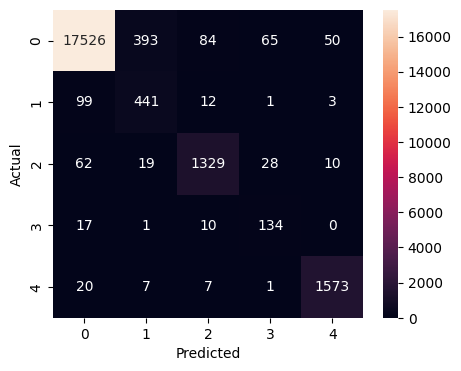

In [61]:
# Confusion Matrix:
cm = confusion_matrix(y_true=y_test, y_pred=np.argmax(model_predictions, axis=1))
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4. Cross Validation:

In [62]:
results = []
estimator = KerasClassifier(build_fn=ann_model, epochs=20, batch_size=64)
kfold = KFold(n_splits=4)
results.append(cross_val_score(estimator,X_train, y_train, cv=kfold))

Epoch 1/20
3364/3364 [==============================] - 6s 1ms/step - loss: 0.7593 - accuracy: 0.7471
Epoch 2/20
3364/3364 [==============================] - 4s 1ms/step - loss: 0.2540 - accuracy: 0.9104
Epoch 3/20
3364/3364 [==============================] - 5s 1ms/step - loss: 0.1842 - accuracy: 0.9360
Epoch 4/20
3364/3364 [==============================] - 4s 1ms/step - loss: 0.1453 - accuracy: 0.9509
Epoch 5/20
3364/3364 [==============================] - 5s 1ms/step - loss: 0.1248 - accuracy: 0.9573
Epoch 6/20
3364/3364 [==============================] - 5s 1ms/step - loss: 0.1079 - accuracy: 0.9638
Epoch 7/20
3364/3364 [==============================] - 5s 1ms/step - loss: 0.0952 - accuracy: 0.9683
Epoch 8/20
3364/3364 [==============================] - 5s 2ms/step - loss: 0.0869 - accuracy: 0.9712
Epoch 9/20
3364/3364 [==============================] - 5s 2ms/step - loss: 0.0792 - accuracy: 0.9736
Epoch 10/20
3364/3364 [==============================] - 5s 2ms/step - loss: 0.071

In [63]:
cv_results = pd.DataFrame(results)
cv_index = ['ANN']
cv_results['Model'] = cv_index
cv_results.set_index('Model', inplace=True)
cv_results['Mean'] = cv_results.mean(axis=1)
cv_results

,0,1,2,3,Mean
Model,,,,,
ANN,0.984238,0.982161,0.987457,0.987666,0.98538
